## Assignment 2, Natural Language Processing, Group 14

# Pre-processing

## Filter corpus

In [5]:
import nltk
import pandas as pd
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
# nltk.download('punkt')
# nltk.download('stopwords')
import re
import random
random.seed(45)

# Load and filter the data
news_df = pd.read_csv('us_equities_news_dataset.csv')
news_df = news_df.drop(columns=['article_id', 'url', 'category', 'release_date', 'provider'])
news_df = news_df.dropna(subset=['content'])
news_df['content'] = news_df['content'].astype(str)


# Filter for articles mentioning 'Nvidia' or 'NVDA' in the ticker, title, or content
pattern_nvidia = r'\b(?:Nvidia|NVDA)\b'
nvidia_mentioned_articles = news_df[
    (news_df['ticker'] == 'NVDA') | 
    news_df['title'].str.contains(pattern_nvidia, case=False, na=False) |
    news_df['content'].str.contains(pattern_nvidia, case=False, na=False)
]

# Save and reload filtered articles to avoid duplicate content
filtered_corpus = nvidia_mentioned_articles.copy()
filtered_corpus.to_csv('filtered_corpus.csv', index=False)

print('Filtered corpus dimensions:', filtered_corpus.shape)

ParserError: Error tokenizing data. C error: Calling read(nbytes) on source failed. Try engine='python'.

## Clean and tokenize filtered corpus

In [7]:
import pandas as pd
import nltk
import pandas as pd
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
# nltk.download('punkt')
# nltk.download('stopwords')
import re

news_df = pd.read_csv('filtered_corpus.csv')

# Set up stopwords
stop_words = set(stopwords.words('english'))

# Function to preprocess and tokenize text
def preprocess_text(text):
    # Convert to lowercase
    text = text.lower()
    # Remove leading and trailing whitespace
    text = text.strip()
    # Remove non-alphabetic characters
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    # Tokenize the text
    tokens = text.split()
    # Remove 1-letter words and stopwords
    tokens = [token for token in tokens if len(token) > 1 and token not in stop_words]
    return tokens

# Apply the function to the content column and create a new 'tokens' column
news_df['tokens'] = news_df['content'].apply(preprocess_text)

# Remove duplicates based on the 'tokens' column
df = news_df.drop_duplicates(subset=['tokens'])
print('Filtered corpus dimensions:', df.shape)
print(df[['content', 'tokens']].head(10))


Filtered corpus dimensions: (3306, 5)
                                             content  \
0  ECB Effects\nThe move in the euro was huge  fa...   
1  6 Stocks To Watch  March 6 Trading Session\nSt...   
2  Investing com   A rout in Apple and Facebook  ...   
3  For Immediate ReleaseChicago  IL   January 13 ...   
4  With 4 500 companies bringing their innovation...   
5  With 4 500 companies bringing their innovation...   
6  When trading opened in 2019  investors were ju...   
7  Excitement is building up for the 2020 Summer ...   
8  For Immediate ReleaseChicago  IL   December 3 ...   
9  For Immediate ReleaseChicago  IL   November 26...   

                                              tokens  
0  [ecb, effects, move, euro, huge, falling, pips...  
1  [stocks, watch, march, trading, session, stock...  
2  [investing, com, rout, apple, facebook, nasdaq...  
3  [immediate, releasechicago, il, january, zacks...  
4  [companies, bringing, innovations, ces, jan, g...  
5  [companies, 

In [9]:
# Function to convert the tokenized column to a list of lists (flatten list)
def make_list_of_lists(data_frame, column_name):
    data = data_frame[column_name].tolist()
    return data

# Create the list of lists for modeling
data = make_list_of_lists(df, 'tokens')
print(len(data))

3306


## top-n% bottom-n% removal

In [12]:
from collections import Counter
def remove_n_percent(processed_text, n=0):
    if n > 0:
        word_freq = Counter([word for doc in processed_text for word in doc])
        top_n = set([word for word, _ in word_freq.most_common(int(n/100*len(word_freq)))])
        bottom_n = set([word for word, _ in word_freq.most_common()[:-int(n/100*len(word_freq))-1:-1]])
        processed_text = [[word for word in doc if word not in top_n and word not in bottom_n] for doc in
        processed_text]
    return processed_text

In [14]:
from collections import Counter

def remove_n_percent(data, n=0):
    """
    Removes the top n% and bottom n% of the most and least frequent words from the input list of lists.
    
    Parameters:
    data (list of lists): The input data, where each sublist contains tokenized text.
    n (float): The percentage of the most and least common words to remove.
    
    Returns:
    list of lists: The input data with the top n% and bottom n% words removed.
    """
    if n <= 0 or n > 50:
        raise ValueError("n should be greater than 0 and less than or equal to 50.")
    
    # Flatten the list of lists to count word frequencies
    all_words = [word for sublist in data for word in sublist]
    word_freq = Counter(all_words)
    # Calculate the number of words to remove for top and bottom n%
    num_words_to_remove = int(n / 100 * len(word_freq))
    # Get the top n% most frequent words
    top_n_words = {word for word, _ in word_freq.most_common(num_words_to_remove)}   
    # Get the bottom n% least frequent words
    bottom_n_words = {word for word, _ in word_freq.most_common()[:-num_words_to_remove -1:-1]}    
    # Combine top and bottom n% words to be removed
    words_to_remove = top_n_words.union(bottom_n_words)   
    # Filter the data to remove these words
    filtered_data = [[word for word in sublist if word not in words_to_remove] for sublist in data]  
    filtered_data = [doc for doc in filtered_data if len(doc) > 0]
    
    return filtered_data

## Load the dataset and choose only the articles where NVIDIA word appears in the content

In [ ]:
# import pandas as pd
# 
# # Load the dataset
# df = pd.read_csv('us_equities_news_dataset.csv')
# 
# # Filter rows where 'content' column contains the word 'NVIDIA'
# nvidia_rows = df[df['content'].str.contains('NVIDIA', case=False, na=False)]
# 
# # Display the filtered rows
# print(nvidia_rows)

## Remove unnecessary columns

In [ ]:
# # Remove the specified columns
# nvidia_rows = nvidia_rows.drop(['id', 'ticker', 'url', 'release_date'], axis=1)
# 
# # Save the modified DataFrame to a new CSV file
# nvidia_rows.to_csv('nvidia_rows_news_dataset.csv', index=False)

## Preprocess the data

In [ ]:
# from nltk.tokenize import word_tokenize
# import re
# from unidecode import unidecode
# import pandas as pd
# from nltk.corpus import stopwords
# from collections import Counter
# from nltk.stem import PorterStemmer
# from nltk.stem import WordNetLemmatizer
# 
# stop_words = set(stopwords.words('english'))
# stemmer = PorterStemmer()
# 
# def preprocess_text(texts):
#     n=0
#     processed_texts = []
#     # lowercasing, keep text only, remove accents, tokenization
#     tokens = [word for word in word_tokenize(re.sub(r'[^a-zA-Z\s]', '', unidecode(texts.lower())))]
#     # stopword removal
#     tokens = [token for token in tokens if token not in stopwords.words('english')]
# 
#     # remove short words
#     tokens = [token for token in tokens if len(token) > 2]
#         
#     # Apply stemming to each token
#     stemmed_tokens = [stemmer.stem(word) for word in tokens]
#         
#     processed_texts.append(stemmed_tokens)
# 
#     # remove top-n% and bottom-n% words (optional)
#     if n > 0:
#         word_freq = Counter([word for sentence in processed_texts for word in sentence])
#         top_n = set([word for word, _ in word_freq.most_common(int(n/100*len(word_freq)))])
#         bottom_n = set([word for word, _ in word_freq.most_common()[:-int(n/100*len(word_freq))-1:-1]])
#         processed_texts = [[word for word in sentence if word not in top_n and word not in bottom_n] for sentence in processed_texts] 
# 
#     # Flattening the list of lists into a single list
#     flattened_list = [item for sublist in processed_texts for item in sublist]
#     
#     return flattened_list
# 
# # Example usage
# FILE_PATH = 'nvidia_rows_news_dataset.csv'
# df = pd.read_csv(FILE_PATH)
# # df = df.head(100)
# text_data = df['content'].tolist()
# 
# # Apply preprocessing function to each article and create a new column 'preprocessed_content'
# df['preprocessed_content'] = df['content'].apply(preprocess_text)
# 
# print("Preprocessing complete. Sample of preprocessed content:")
# print(df[['content', 'preprocessed_content']].head())  # Display a sample
# 
# # Save the modified DataFrame to a new CSV file
# df.to_csv('nvidia_rows_news_dataset_preprocessed.csv', index=False)
# 
# print(f"Length of text_data {len(text_data)}")

# Train FLSA-W Model

# Experimentation

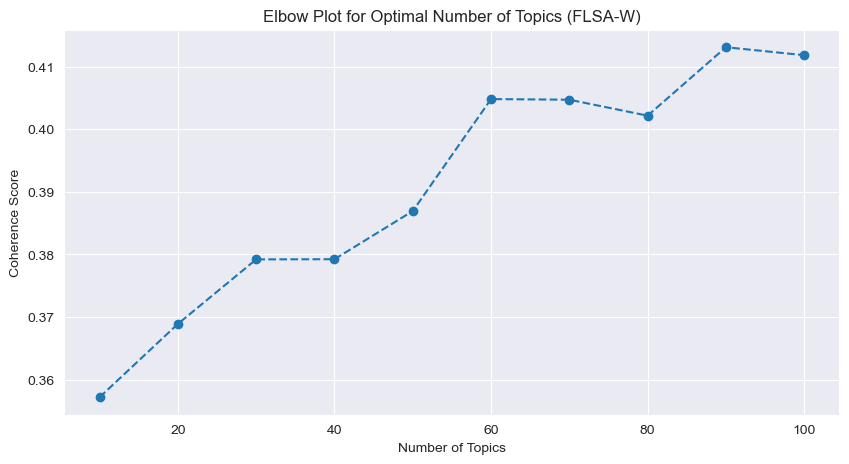

In [31]:
import matplotlib.pyplot as plt
from FuzzyTM import FLSA_W
# Range of topic numbers to test
topic_numbers = range(10, 101, 10)
coherence_scores = []

for num_topics in topic_numbers:
    flsaW = FLSA_W(
        input_file=data,  # Preprocessed data
        num_topics=num_topics,
        num_words=10
    )
    pwgt, ptgd = flsaW.get_matrices()  # Train the model
    coherence_score = flsaW.get_coherence_score()  # Calculate coherence
    coherence_scores.append(coherence_score)

# Plotting the Elbow Plot
plt.figure(figsize=(10, 5))
plt.plot(topic_numbers, coherence_scores, marker='o', linestyle='--')
plt.xlabel('Number of Topics')
plt.ylabel('Coherence Score')
plt.title('Elbow Plot for Optimal Number of Topics (FLSA-W)')
plt.show()

After 60 topics it the curve starts to flatten. After 60 topics there is no substantial increase in the coherence score. We can experiment with 60 topics.

# Iteration 0: full data

In [34]:
# Parameters
flsaw_data = data
num_topics = 60
num_words = 10

flsaW = FLSA_W(
    input_file = flsaw_data,
    num_topics=num_topics,
    num_words=num_words,
)

flsaW.get_vocabulary_size()
pwgt, ptgd = flsaW.get_matrices() # THIS TRAINS THE MODEL


print(flsaW.show_topics())

for topic in flsaW.show_topics(representation='words'):
    print(topic)
  
    
print("Coherence Score:", flsaW.get_coherence_score())
print("Diversity Score:",flsaW.get_diversity_score())
print("Interpretability Score:",flsaW.get_interpretability_score())

[(0, '0.001*"soxl" + 0.0009*"gelyy" + 0.0008*"audvf" + 0.0008*"suspends" + 0.0007*"nysearca" + 0.0007*"xth" + 0.0007*"ichr" + 0.0007*"xitk" + 0.0007*"rom" + 0.0007*"jhmt"'), (1, '0.0061*"worst" + 0.0051*"screens" + 0.0051*"elsewhere" + 0.0046*"resistance" + 0.0045*"unveiled" + 0.0043*"forecasts" + 0.0041*"begun" + 0.0041*"periods" + 0.0041*"division" + 0.004*"delivering"'), (2, '0.0098*"thursday" + 0.009*"friday" + 0.0086*"intel" + 0.0085*"rise" + 0.0085*"meanwhile" + 0.0083*"added" + 0.008*"launch" + 0.0079*"generate" + 0.0078*"profit" + 0.0077*"negative"'), (3, '0.0067*"fund" + 0.006*"lrcx" + 0.0055*"pulled" + 0.0054*"inventory" + 0.0052*"editor" + 0.0052*"cnbc" + 0.0052*"newsletter" + 0.005*"gs" + 0.005*"info" + 0.005*"funds"'), (4, '0.0019*"vlkay" + 0.0016*"randewich" + 0.0016*"noel" + 0.0013*"kramer" + 0.0013*"mainstay" + 0.0013*"raymond" + 0.0012*"singular" + 0.0012*"stm" + 0.0012*"chesapeake" + 0.0012*"sweden"'), (5, '0.0243*"latest" + 0.0207*"china" + 0.0194*"special" + 0.0192*

Diversity score of 1.0 indicates that the topics are completely distinct from each other, with no significant overlap in the words that define them. 

Coherence score of 0.41 suggests that while the topics have some level of meaningful structure, there is room for improvement.

Content:

# Iteration 1: Remove 5% most common and rarest words

In [35]:
# Parameters
flsaw_data = remove_n_percent(data, 5)
num_topics=60
num_words=10

flsaW = FLSA_W(
    input_file = flsaw_data,
    num_topics=num_topics,
    num_words=num_words,
)

flsaW.get_vocabulary_size()
pwgt, ptgd = flsaW.get_matrices() # THIS TRAINS THE MODEL


print(flsaW.show_topics())

for topic in flsaW.show_topics(representation='words'):
    print(topic)
  
    
print("Coherence Score:", flsaW.get_coherence_score())
print("Diversity Score:",flsaW.get_diversity_score())
print("Interpretability Score:",flsaW.get_interpretability_score())

[(0, '0.0098*"floor" + 0.0073*"strike" + 0.0052*"file" + 0.0048*"strictly" + 0.0044*"bloc" + 0.0039*"provocative" + 0.0036*"examine" + 0.0036*"chat" + 0.0035*"raw" + 0.0032*"macy"'), (1, '0.0027*"premarket" + 0.0026*"considerhere" + 0.0022*"soxx" + 0.0022*"conclusively" + 0.0018*"delve" + 0.0017*"traced" + 0.0017*"boomed" + 0.0017*"polled" + 0.0016*"aaa" + 0.0015*"southwestern"'), (2, '0.008*"racing" + 0.0078*"emotion" + 0.0073*"frontier" + 0.0062*"fever" + 0.006*"ralph" + 0.0058*"massively" + 0.0057*"winner" + 0.0055*"writer" + 0.0054*"stating" + 0.0051*"habits"'), (3, '0.0009*"soxl" + 0.0007*"conclusionas" + 0.0007*"itus" + 0.0007*"suspends" + 0.0007*"tndm" + 0.0007*"xth" + 0.0007*"maritime" + 0.0006*"abil" + 0.0006*"dwdp" + 0.0006*"cnat"'), (4, '0.0007*"trv" + 0.0007*"gelyy" + 0.0007*"ei" + 0.0006*"zackstoday" + 0.0006*"considerwe" + 0.0006*"ndls" + 0.0006*"wipro" + 0.0006*"panchadar" + 0.0006*"arjun" + 0.0006*"cslt"'), (5, '0.0141*"cutting" + 0.0131*"safe" + 0.0131*"raising" + 0.01

Coherence score dropped while diversity stays at maximum.

# Iteration 2: Remove 10%

In [37]:
# Parameters
flsaw_data = remove_n_percent(data, 10)
num_topics=60
num_words=10

flsaW = FLSA_W(
    input_file = flsaw_data,
    num_topics=num_topics,
    num_words=num_words,
)

flsaW.get_vocabulary_size()
pwgt, ptgd = flsaW.get_matrices() # THIS TRAINS THE MODEL


print(flsaW.show_topics())

for topic in flsaW.show_topics(representation='words'):
    print(topic)
  
    
print("Coherence Score:", flsaW.get_coherence_score())
print("Diversity Score:",flsaW.get_diversity_score())
print("Interpretability Score:",flsaW.get_interpretability_score())

[(0, '0.001*"ftxl" + 0.0008*"flowthe" + 0.0007*"nktr" + 0.0007*"amtek" + 0.0007*"stockholders" + 0.0007*"favourable" + 0.0007*"gelyy" + 0.0007*"canaccord" + 0.0007*"endp" + 0.0007*"backtest"'), (1, '0.0321*"afford" + 0.0306*"values" + 0.0287*"ipads" + 0.0264*"directions" + 0.0247*"discussing" + 0.0239*"perfectly" + 0.0211*"knowing" + 0.0209*"controversy" + 0.0195*"daniel" + 0.0184*"passage"'), (2, '0.0116*"exceed" + 0.0103*"fantastic" + 0.0097*"realized" + 0.0089*"rallies" + 0.0086*"attached" + 0.0081*"profiles" + 0.0078*"emotion" + 0.0076*"implications" + 0.0076*"disruption" + 0.0076*"copy"'), (3, '0.0041*"intense" + 0.0034*"courtesy" + 0.0031*"midday" + 0.0031*"doubts" + 0.0031*"contributor" + 0.0028*"plain" + 0.0027*"attaining" + 0.0027*"propel" + 0.0024*"penetrate" + 0.0024*"ore"'), (4, '0.0057*"anytime" + 0.0051*"serves" + 0.0049*"accidents" + 0.0048*"pays" + 0.0046*"database" + 0.0045*"appropriate" + 0.0045*"readings" + 0.0044*"initiated" + 0.0044*"representative" + 0.0042*"under

A significant increase in Coherence score after the first iteration but still lower than Iteration 0.

## Iteration 3: Remove 15%

In [39]:
# Parameters
flsaw_data = remove_n_percent(data, 15)
num_topics=60
num_words=10

flsaW = FLSA_W(
    input_file = flsaw_data,
    num_topics=num_topics,
    num_words=num_words,
)

flsaW.get_vocabulary_size()
pwgt, ptgd = flsaW.get_matrices() # THIS TRAINS THE MODEL


print(flsaW.show_topics())

for topic in flsaW.show_topics(representation='words'):
    print(topic)
  
    
print("Coherence Score:", flsaW.get_coherence_score())
print("Diversity Score:",flsaW.get_diversity_score())
print("Interpretability Score:",flsaW.get_interpretability_score())

[(0, '0.0127*"neuro" + 0.0127*"blake" + 0.0127*"misuses" + 0.0127*"anarchist" + 0.0127*"tatters" + 0.0127*"foretaste" + 0.0127*"dance" + 0.0127*"bakunin" + 0.0127*"bloodstream" + 0.0127*"heritable"'), (1, '0.0097*"pursuing" + 0.0093*"excessive" + 0.0073*"collecting" + 0.0072*"meltdown" + 0.007*"reader" + 0.007*"monetize" + 0.0068*"latin" + 0.0068*"wsj" + 0.0066*"distributed" + 0.0065*"safely"'), (2, '0.0214*"diversity" + 0.0192*"behalf" + 0.011*"feet" + 0.0087*"jv" + 0.0087*"terror" + 0.0083*"xm" + 0.0081*"censors" + 0.0081*"hispanics" + 0.0081*"fraudulently" + 0.0081*"hyperconverged"'), (3, '0.0044*"council" + 0.0042*"ordering" + 0.004*"cupertino" + 0.004*"costly" + 0.0038*"outlets" + 0.0036*"compromise" + 0.0035*"worrying" + 0.0035*"brewing" + 0.0033*"spun" + 0.0033*"replacing"'), (4, '0.0584*"illusion" + 0.0583*"woke" + 0.0401*"ariely" + 0.04*"consciously" + 0.0398*"monsters" + 0.0395*"cerebral" + 0.0395*"tory" + 0.0394*"reconciling" + 0.0394*"teaches" + 0.0393*"obituary"'), (5, '0.

Coherence score of approximately 0.44 is an improvement from the starting point 0.41 . This suggests that the topics generated in this iteration are more semantically meaningful, with words in each topic being more closely related. The increase in coherence indicates that the adjusting top_n_percent to 15% helped create more coherent and contextually relevant topics.

Removing the top and bottom 15% of the most frequent words appears to have helped improve coherence without drastically affecting diversity. This might mean that common and rare words removed in this step were indeed not contributing much to topic quality.

In [46]:
# Parameters
flsaw_data = remove_n_percent(data, 20)
num_topics=60
num_words=10

flsaW = FLSA_W(
    input_file = flsaw_data,
    num_topics=num_topics,
    num_words=num_words,
)

flsaW.get_vocabulary_size()
pwgt, ptgd = flsaW.get_matrices() # THIS TRAINS THE MODEL


print(flsaW.show_topics())

for topic in flsaW.show_topics(representation='words'):
    print(topic)
  
    
print("Coherence Score:", flsaW.get_coherence_score())
print("Diversity Score:",flsaW.get_diversity_score())
print("Interpretability Score:",flsaW.get_interpretability_score())

[(0, '0.0199*"understood" + 0.0169*"complexities" + 0.0158*"suing" + 0.0128*"creatures" + 0.0108*"receptor" + 0.0104*"unrealistic" + 0.0101*"defect" + 0.0096*"weighty" + 0.0093*"hospital" + 0.0082*"bucks"'), (1, '0.0356*"founding" + 0.0311*"confusing" + 0.0292*"infinite" + 0.0281*"illusion" + 0.0234*"philosophy" + 0.0213*"champions" + 0.0198*"cerebral" + 0.0197*"sha" + 0.0197*"softee" + 0.0195*"tinker"'), (2, '0.0504*"explicit" + 0.0466*"interviewed" + 0.0422*"lucky" + 0.0417*"interacting" + 0.0384*"addiction" + 0.0367*"scramble" + 0.0365*"mit" + 0.0339*"allen" + 0.032*"politically" + 0.0272*"noah"'), (3, '0.0016*"bolstering" + 0.0015*"completing" + 0.0015*"cheered" + 0.0014*"grmn" + 0.0014*"instrumental" + 0.0014*"motorola" + 0.0014*"ftnt" + 0.0014*"pricey" + 0.0014*"pave" + 0.0013*"calculating"'), (4, '0.0269*"consequences" + 0.0257*"enriched" + 0.0221*"copy" + 0.0198*"shelves" + 0.0198*"blank" + 0.0192*"inevitably" + 0.0191*"disastrous" + 0.0188*"thrive" + 0.0175*"grasp" + 0.017*"br

## Iteration 4: num_words per topic = 5

In [49]:
# Parameters
flsaw_data = data
num_topics=60
num_words=5

flsaW = FLSA_W(
    input_file = data,
    num_topics=num_topics,
    num_words=num_words,
)

flsaW.get_vocabulary_size()
pwgt, ptgd = flsaW.get_matrices() # THIS TRAINS THE MODEL


print(flsaW.show_topics())

for topic in flsaW.show_topics(representation='words'):
    print(topic)
  
    
print("Coherence Score:", flsaW.get_coherence_score())
print("Diversity Score:",flsaW.get_diversity_score())
print("Interpretability Score:",flsaW.get_interpretability_score())

[(0, '0.0017*"delphi" + 0.0016*"utilizes" + 0.0016*"stalled" + 0.0016*"subscribe" + 0.0016*"shrunk"'), (1, '0.0036*"gmt" + 0.0031*"gainers" + 0.0029*"wondrous" + 0.0028*"favored" + 0.0028*"vectors"'), (2, '0.0035*"soar" + 0.0033*"parent" + 0.0032*"unchanged" + 0.0032*"boom" + 0.0031*"hence"'), (3, '0.0599*"nasdaq" + 0.0461*"companies" + 0.038*"next" + 0.0379*"still" + 0.0371*"high"'), (4, '0.0112*"blast" + 0.0077*"suggest" + 0.0076*"smartphones" + 0.0075*"comments" + 0.007*"changed"'), (5, '0.0028*"performers" + 0.0022*"hemophilia" + 0.0022*"advancers" + 0.0022*"stone" + 0.002*"automatic"'), (6, '0.0039*"lie" + 0.0038*"pursuing" + 0.0038*"filling" + 0.0035*"arrive" + 0.0034*"universities"'), (7, '0.0236*"latest" + 0.0204*"special" + 0.0198*"fb" + 0.0197*"move" + 0.019*"china"'), (8, '0.0096*"chips" + 0.0093*"robust" + 0.0085*"states" + 0.0084*"upside" + 0.0083*"efforts"'), (9, '0.0055*"commodities" + 0.0048*"percent" + 0.0048*"remarkable" + 0.0047*"ratio" + 0.0044*"cards"'), (10, '0.01

## Iteration 5: num_words per topic = 15

In [ ]:
# Parameters
flsaw_data = data
num_topics=60
num_words=15

flsaW = FLSA_W(
    input_file = data,
    num_topics=num_topics,
    num_words=num_words,
)

flsaW.get_vocabulary_size()
pwgt, ptgd = flsaW.get_matrices() # THIS TRAINS THE MODEL


print(flsaW.show_topics())

for topic in flsaW.show_topics(representation='words'):
    print(topic)
  
    
print("Coherence Score:", flsaW.get_coherence_score())
print("Diversity Score:",flsaW.get_diversity_score())
print("Interpretability Score:",flsaW.get_interpretability_score())

## Iteration 6: num_words per topic = 20

In [ ]:
# Parameters
flsaw_data = data
num_topics=60
num_words=20

flsaW = FLSA_W(
    input_file = data,
    num_topics=num_topics,
    num_words=num_words,
)

flsaW.get_vocabulary_size()
pwgt, ptgd = flsaW.get_matrices() # THIS TRAINS THE MODEL


print(flsaW.show_topics())

for topic in flsaW.show_topics(representation='words'):
    print(topic)
  
    
print("Coherence Score:", flsaW.get_coherence_score())
print("Diversity Score:",flsaW.get_diversity_score())
print("Interpretability Score:",flsaW.get_interpretability_score())

## Train LDA model

### Plot coherence score (I ran it for over 1 hour on Google Colab with GPU and it still did not converge)

In [16]:
import matplotlib.pyplot as plt
import gensim
from gensim import corpora
from gensim.models import CoherenceModel
import re

# Range of topic numbers to test
topic_numbers = range(10, 101, 10)
coherence_scores = []

dictionary = corpora.Dictionary(data)
corpus = [dictionary.doc2bow(text) for text in data]

for num_topics in topic_numbers:
    # Train the LDA model
    lda_model = gensim.models.LdaModel(corpus=corpus, id2word=dictionary, num_topics=num_topics, random_state=100, passes=10)
    #Get coherence score
    coherence_score = CoherenceModel(model=lda_model, texts=data, dictionary=dictionary, coherence='c_v').get_coherence()
    coherence_scores.append(coherence_score)

# Plotting the Elbow Plot
plt.figure(figsize=(10, 5))
plt.plot(topic_numbers, coherence_scores, marker='o', linestyle='--')
plt.xlabel('Number of Topics')
plt.ylabel('Coherence Score')
plt.title('Elbow Plot for Optimal Number of Topics (LDA)')
plt.show()

KeyboardInterrupt: 

## Function for diversity score

In [18]:
def diversity_score(lda_model, top_n_words=10):
    # Extract top N words from each topic
    topics = lda_model.show_topics(num_topics=-1, num_words=top_n_words, formatted=False)
    
    # Flatten the top words from each topic into a set to keep only unique words
    unique_words = set(word for topic in topics for word, _ in topic[1])
    
    # Total number of words if there were no overlap
    total_possible_words = len(topics) * top_n_words
    
    # Diversity score as the ratio of unique words to total possible words
    diversity = len(unique_words) / total_possible_words
    return diversity

In [20]:
from gensim.models import Word2Vec
from sklearn.metrics import jaccard_score
import numpy as np

def interpretability_score(lda_model, top_n_words=10):
    # Extract top N words for each topic
    topics = [[word for word, prob in lda_model.show_topic(t, top_n_words)] for t in range(lda_model.num_topics)]
    
    # Calculate Jaccard similarity between each pair of topics
    jaccard_similarities = []
    for i in range(len(topics)):
        for j in range(i + 1, len(topics)):
            # Convert lists to sets for Jaccard calculation
            set_i, set_j = set(topics[i]), set(topics[j])
            intersection = len(set_i.intersection(set_j))
            union = len(set_i.union(set_j))
            jaccard_sim = intersection / union if union != 0 else 0
            jaccard_similarities.append(jaccard_sim)
    
    # Compute interpretability as 1 - average Jaccard similarity (higher is better)
    avg_jaccard_similarity = np.mean(jaccard_similarities)
    interpretability = 1 - avg_jaccard_similarity
    return interpretability

## Iteration 0 full data

In [30]:
import gensim
from gensim import corpora
from gensim.models import CoherenceModel
import re

# Create a dictionary and corpus from the preprocessed data
dictionary = corpora.Dictionary(data)
corpus = [dictionary.doc2bow(text) for text in data]

# Train the LDA model
lda_model = gensim.models.LdaModel(corpus=corpus, id2word=dictionary, num_topics=20, random_state=100, passes=10)

# Print the topics found by the LDA model
topics = lda_model.print_topics(num_words=10)
for topic in topics:
    print(topic)
#Get coherence score
print(CoherenceModel(model=lda_model, texts=data, dictionary=dictionary, coherence='c_v').get_coherence())
print("Diversity Score:", diversity_score(lda_model, top_n_words=10))
print("Interpretability Score:", interpretability_score(lda_model, top_n_words=10))

(0, '0.017*"intel" + 0.011*"said" + 0.009*"apple" + 0.009*"chips" + 0.008*"qualcomm" + 0.007*"also" + 0.006*"nasdaq" + 0.006*"chip" + 0.006*"market" + 0.006*"technology"')
(1, '0.009*"facebook" + 0.008*"growth" + 0.008*"company" + 0.006*"stock" + 0.006*"one" + 0.006*"think" + 0.006*"like" + 0.005*"year" + 0.005*"new" + 0.005*"good"')
(2, '0.032*"year" + 0.029*"quarter" + 0.023*"zacks" + 0.019*"million" + 0.018*"company" + 0.017*"revenues" + 0.017*"earnings" + 0.012*"billion" + 0.011*"consensus" + 0.011*"estimate"')
(3, '0.011*"arora" + 0.011*"crest" + 0.008*"rockwell" + 0.008*"nigam" + 0.007*"marsh" + 0.006*"mcconnell" + 0.006*"mclennan" + 0.005*"mmc" + 0.005*"solar" + 0.003*"saturation"')
(4, '0.015*"nvidia" + 0.013*"company" + 0.012*"nasdaq" + 0.009*"driving" + 0.009*"market" + 0.009*"technology" + 0.009*"ai" + 0.008*"zacks" + 0.006*"new" + 0.006*"intel"')
(5, '0.023*"company" + 0.015*"growth" + 0.015*"zacks" + 0.013*"nasdaq" + 0.011*"storage" + 0.010*"rank" + 0.009*"term" + 0.008*"s

# Iteration 1: Remove 5% most common and rarest words

In [27]:
import gensim
from gensim import corpora
from gensim.models import CoherenceModel
import re

lda_data = remove_n_percent(data, 5)
num_topics=60
num_words=10

dictionary = corpora.Dictionary(lda_data)
corpus = [dictionary.doc2bow(text) for text in lda_data]

lda_model = gensim.models.LdaModel(corpus=corpus, id2word=dictionary, num_topics=num_topics, random_state=100, passes=10)

# Print the topics found by the LDA model
topics = lda_model.print_topics(num_words=num_words)
for topic in topics:
    print(topic)
    
#Get coherence score
print(CoherenceModel(model=lda_model, texts=lda_data, dictionary=dictionary, coherence='c_v').get_coherence())
print("Diversity Score:", diversity_score(lda_model, top_n_words=num_words))
print("Interpretability Score:", interpretability_score(lda_model, top_n_words=num_words))

(54, '0.025*"dave" + 0.011*"lunch" + 0.009*"ryan" + 0.008*"est" + 0.008*"udacity" + 0.008*"scientific" + 0.007*"bartosiak" + 0.007*"wayfair" + 0.007*"son" + 0.006*"garmin"')
(5, '0.029*"rbc" + 0.020*"thank" + 0.017*"groupon" + 0.017*"fedex" + 0.014*"steves" + 0.011*"mitch" + 0.011*"fdx" + 0.010*"discretionary" + 0.009*"estimize" + 0.009*"weighted"')
(47, '0.013*"microchip" + 0.012*"tegra" + 0.010*"packard" + 0.010*"visualization" + 0.009*"inference" + 0.008*"hewlett" + 0.007*"repurchases" + 0.007*"sequential" + 0.007*"pascal" + 0.007*"impacted"')
(53, '0.012*"fng" + 0.011*"reiterated" + 0.011*"unique" + 0.010*"yoy" + 0.009*"ca" + 0.009*"ebay" + 0.009*"twilio" + 0.007*"tends" + 0.007*"accurate" + 0.006*"marketplace"')
(45, '0.010*"wedge" + 0.009*"swing" + 0.008*"popped" + 0.006*"consolidation" + 0.005*"melt" + 0.005*"cmg" + 0.005*"monster" + 0.005*"handle" + 0.004*"simple" + 0.004*"tells"')
(21, '0.019*"fireeye" + 0.017*"mart" + 0.016*"wal" + 0.014*"troy" + 0.014*"implied" + 0.013*"cybe

# Iteration 2: Remove 10%

In [30]:
lda_data = remove_n_percent(data, 10)
num_topics=60
num_words=10

dictionary = corpora.Dictionary(lda_data)
corpus = [dictionary.doc2bow(text) for text in lda_data]

lda_model = gensim.models.LdaModel(corpus=corpus, id2word=dictionary, num_topics=num_topics, random_state=100, passes=10)

# Print the topics found by the LDA model
topics = lda_model.print_topics(num_words=num_words)
for topic in topics:
    print(topic)
    
#Get coherence score
print(CoherenceModel(model=lda_model, texts=lda_data, dictionary=dictionary, coherence='c_v').get_coherence())
print("Diversity Score:", diversity_score(lda_model, top_n_words=num_words))
print("Interpretability Score:", interpretability_score(lda_model, top_n_words=num_words))

(14, '0.015*"forma" + 0.009*"considercurrently" + 0.009*"rader" + 0.008*"zettabytes" + 0.008*"jefferies" + 0.008*"sgh" + 0.008*"facts" + 0.007*"film" + 0.007*"nasa" + 0.007*"disease"')
(25, '0.008*"jul" + 0.008*"stupid" + 0.006*"liberty" + 0.006*"decreasing" + 0.006*"advancements" + 0.006*"booking" + 0.006*"advertisements" + 0.005*"boards" + 0.005*"bus" + 0.005*"appliances"')
(46, '0.019*"accenture" + 0.015*"cognizant" + 0.009*"cc" + 0.008*"starbucks" + 0.008*"ncr" + 0.008*"subscribe" + 0.007*"trap" + 0.007*"maddy" + 0.006*"teradata" + 0.006*"gilead"')
(48, '0.008*"cgi" + 0.006*"grid" + 0.006*"shield" + 0.005*"cord" + 0.005*"earth" + 0.005*"andy" + 0.005*"chemical" + 0.005*"elliott" + 0.005*"ron" + 0.005*"packages"')
(26, '0.009*"hemophilia" + 0.008*"dystrophy" + 0.008*"muscular" + 0.008*"leukemia" + 0.007*"nowzacks" + 0.006*"qplum" + 0.006*"beneath" + 0.005*"poker" + 0.004*"duke" + 0.004*"paper"')
(34, '0.006*"sun" + 0.006*"fortive" + 0.005*"broadband" + 0.005*"prosecutors" + 0.004*"c

## Iteration 3: Remove 15%

In [33]:
lda_data = remove_n_percent(data, 15)
num_topics=60
num_words=10

dictionary = corpora.Dictionary(lda_data)
corpus = [dictionary.doc2bow(text) for text in lda_data]

lda_model = gensim.models.LdaModel(corpus=corpus, id2word=dictionary, num_topics=num_topics, random_state=100, passes=10)

# Print the topics found by the LDA model
topics = lda_model.print_topics(num_words=num_words)
for topic in topics:
    print(topic)
    
#Get coherence score
print(CoherenceModel(model=lda_model, texts=lda_data, dictionary=dictionary, coherence='c_v').get_coherence())
print("Diversity Score:", diversity_score(lda_model, top_n_words=num_words))
print("Interpretability Score:", interpretability_score(lda_model, top_n_words=num_words))

(42, '0.009*"blackrock" + 0.007*"cryptos" + 0.007*"fork" + 0.007*"derivatives" + 0.006*"raytheon" + 0.006*"altria" + 0.006*"calculate" + 0.006*"barrett" + 0.005*"mo" + 0.005*"tumbling"')
(25, '0.010*"neena" + 0.010*"mailbag" + 0.007*"emotion" + 0.007*"cables" + 0.006*"swapped" + 0.006*"campos" + 0.005*"editors" + 0.005*"rodrigo" + 0.005*"tide" + 0.005*"gigabit"')
(7, '0.018*"protium" + 0.017*"avnet" + 0.017*"signoff" + 0.011*"barefoot" + 0.009*"tensilica" + 0.008*"emulation" + 0.007*"prototyping" + 0.006*"farnell" + 0.006*"inbound" + 0.006*"functional"')
(15, '0.011*"lipacis" + 0.007*"quant" + 0.006*"wtwa" + 0.006*"doug" + 0.006*"aftermarket" + 0.005*"spreading" + 0.005*"parents" + 0.004*"accurately" + 0.004*"dexcom" + 0.004*"writes"')
(19, '0.015*"grubhub" + 0.015*"udacity" + 0.012*"bln" + 0.011*"grub" + 0.011*"homeaway" + 0.009*"xerox" + 0.008*"trivago" + 0.008*"bpd" + 0.007*"verifone" + 0.006*"openings"')
(22, '0.013*"crest" + 0.009*"vivek" + 0.008*"thematic" + 0.007*"nuance" + 0.00

# Iteration 4: Remove 20%

In [22]:
import matplotlib.pyplot as plt
import gensim
from gensim import corpora
from gensim.models import CoherenceModel
import re

lda_data = remove_n_percent(data, 20)
num_topics=60
num_words=10

dictionary = corpora.Dictionary(lda_data)
corpus = [dictionary.doc2bow(text) for text in lda_data]

lda_model = gensim.models.LdaModel(corpus=corpus, id2word=dictionary, num_topics=num_topics, random_state=100, passes=10)

# Print the topics found by the LDA model
topics = lda_model.print_topics(num_words=num_words)
for topic in topics:
    print(topic)
    
#Get coherence score
print(CoherenceModel(model=lda_model, texts=lda_data, dictionary=dictionary, coherence='c_v').get_coherence())
print("Diversity Score:", diversity_score(lda_model, top_n_words=num_words))
print("Interpretability Score:", interpretability_score(lda_model, top_n_words=num_words))

(42, '0.006*"royalties" + 0.006*"underpinned" + 0.005*"flights" + 0.005*"jail" + 0.005*"kb" + 0.005*"addressing" + 0.005*"attorney" + 0.005*"throws" + 0.005*"transpired" + 0.004*"okay"')
(23, '0.013*"winklevoss" + 0.012*"twins" + 0.012*"fork" + 0.011*"gbtc" + 0.009*"xpo" + 0.008*"fingerprint" + 0.007*"matt" + 0.007*"duck" + 0.007*"classes" + 0.007*"superpod"')
(51, '0.010*"zumiez" + 0.007*"probabilities" + 0.007*"nextera" + 0.007*"brett" + 0.006*"zumz" + 0.006*"root" + 0.005*"surveys" + 0.005*"impulse" + 0.005*"resumes" + 0.005*"simon"')
(58, '0.012*"teradata" + 0.008*"bodies" + 0.007*"phy" + 0.007*"verint" + 0.007*"digitimes" + 0.007*"setups" + 0.007*"tokens" + 0.006*"harnessing" + 0.006*"pos" + 0.006*"infamous"')
(26, '0.010*"doors" + 0.009*"dudley" + 0.009*"recipe" + 0.009*"vastly" + 0.007*"bullet" + 0.007*"interpreted" + 0.006*"io" + 0.006*"convincing" + 0.006*"ackman" + 0.006*"alaska"')
(7, '0.011*"ss" + 0.009*"song" + 0.008*"tended" + 0.007*"thrones" + 0.007*"characters" + 0.007*

In [25]:
# !pip install pyLDAvis

INFO: pip is looking at multiple versions of pyfume to determine which version is compatible with other requirements. This could take a while.
  Using cached pyFUME-0.3.1-py3-none-any.whl.metadata (9.7 kB)
   ---------------------------------------- 0.0/2.6 MB ? eta -:--:--
   ---------------------------------------- 2.6/2.6 MB 21.3 MB/s eta 0:00:00
   ---------------------------------------- 0.0/11.6 MB ? eta -:--:--
   -------------------- ------------------- 6.0/11.6 MB 28.4 MB/s eta 0:00:01
   --------------------------- ------------ 8.1/11.6 MB 19.3 MB/s eta 0:00:01
   ---------------------------------------- 11.6/11.6 MB 20.2 MB/s eta 0:00:00
Using cached pyFUME-0.3.1-py3-none-any.whl (59 kB)
  Attempting uninstall: pandas
    Found existing installation: pandas 1.5.3
    Uninstalling pandas-1.5.3:
      Successfully uninstalled pandas-1.5.3
  Attempting uninstall: pyfume
    Found existing installation: pyFUME 0.3.4
    Uninstalling pyFUME-0.3.4:
      Successfully uninstalled p

  You can safely remove it manually.

[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


## Visualizing topics from the LDA Model  

In [33]:
#vis
import pyLDAvis
import pyLDAvis.gensim

lda_data = remove_n_percent(data, 20)
dictionary = corpora.Dictionary(lda_data)
corpus = [dictionary.doc2bow(text) for text in lda_data]

pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(lda_model, corpus, dictionary, mds="mmds", R=30, sort_topics=False)
vis
# pyLDAvis.save_html(vis, 'lda_visualization.html')

C:\Users\48504\anaconda3\Lib\site-packages\sklearn\manifold\_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(


PreparedData(topic_coordinates=              x         y  topics  cluster      Freq
topic                                               
0      0.152020  0.267991       1        1  1.635081
1      0.259372  0.061636       2        1  1.669157
2     -0.130974  0.211787       3        1  1.782938
3     -0.024736  0.360895       4        1  1.703878
4      0.297931 -0.066460       5        1  1.532160
5      0.190572 -0.050432       6        1  1.300535
6      0.017621  0.293869       7        1  1.427730
7     -0.261301 -0.107300       8        1  1.619688
8     -0.195096  0.166924       9        1  1.253678
9      0.307770  0.238005      10        1  1.988531
10     0.313489  0.165444      11        1  1.602368
11    -0.033382  0.135945      12        1  1.162272
12    -0.246721  0.004937      13        1  1.705509
13    -0.239474  0.287144      14        1  1.832894
14    -0.056359 -0.001100      15        1  1.212849
15    -0.101653  0.276296      16        1  1.394400
16    -0.162781  0.070160      17        1  1.547687
17    -0.369423 -0.053762      18        1  2.042940
18     0.051809  0.173458      19        1  1.300175
19     0.164151  0.096288      20        1  1.073083
20    -0.395435  0.009308      21        1  2.338226
21     0.059875 -0.254140      22        1  1.418255
22     0.235000  0.242440      23        1  1.750657
23    -0.180308 -0.329916      24        1  1.617819
24    -0.332377 -0.209407      25        1  1.747980
25     0.056099  0.025028      26        1  1.520914
26     0.368151 -0.095913      27        1  1.827254
27    -0.261430 -0.221167      28        1  1.639628
28     0.145192 -0.296186      29        1  1.860511
29     0.013887 -0.161025      30        1  1.226986
30    -0.227477 -0.281648      31        1  1.455601
31     0.098734 -0.393063      32        1  2.442670
32    -0.122994 -0.050349      33        1  1.061504
33     0.250012 -0.265190      34        1  1.777469
34     0.320278 -0.231753      35        1  2.145969
35     0.365347 -0.003742      36        1  1.515479
36     0.306856  0.058773      37        1  1.435373
37     0.185942 -0.332679      38        1  1.806079
38    -0.082118 -0.152289      39        1  1.258188
39    -0.109750 -0.328363      40        1  1.726183
40    -0.353698 -0.124689      41        1  2.005848
41    -0.297018  0.076886      42        1  1.545317
42     0.016841 -0.375587      43        1  2.182076
43    -0.063874 -0.385963      44        1  2.133770
44     0.086599  0.399455      45        1  2.137305
45    -0.303042  0.164625      46        1  1.721788
46    -0.302223  0.226994      47        1  1.861122
47    -0.174145 -0.181883      48        1  1.473532
48    -0.049877 -0.256873      49        1  1.512268
49     0.191780 -0.189977      50        1  1.368378
50     0.328810 -0.165973      51        1  1.837348
51     0.217886  0.333337      52        1  2.278141
52    -0.400453  0.112825      53        1  2.557299
53     0.103263  0.350446      54        1  2.122203
54    -0.175971  0.325265      55        1  1.861785
55    -0.102409  0.376275      56        1  2.029299
56     0.045118 -0.072334      57        1  1.012693
57     0.128664 -0.097561      58        1  1.106434
58     0.379090  0.107522      59        1  1.819853
59     0.098338  0.116764      60        1  1.073245, topic_info=             Term       Freq      Total Category  logprob  loglift
11485     allison  23.000000  23.000000  Default  30.0000  30.0000
15163         bln  19.000000  19.000000  Default  29.0000  29.0000
7464      rolland  21.000000  21.000000  Default  28.0000  28.0000
13903  sequencing  22.000000  22.000000  Default  27.0000  27.0000
14697        apis  19.000000  19.000000  Default  26.0000  26.0000
...           ...        ...        ...      ...      ...      ...
4824      smashed   4.840899  11.057896  Topic60  -5.1485   3.7084
6859       fiasco   4.778245  10.973556  Topic60  -5.1616   3.7031
1688    copyright   4.773815  11.697480  Topic60  -5.1625   3.6383
5

## Iteration 5: num_words per topic = 5

In [24]:
import gensim
from gensim import corpora
from gensim.models import CoherenceModel
import re

lda_data = data
num_topics=60
num_words=5

dictionary = corpora.Dictionary(lda_data)
corpus = [dictionary.doc2bow(text) for text in lda_data]

lda_model = gensim.models.LdaModel(corpus=corpus, id2word=dictionary, num_topics=num_topics, random_state=100, passes=10)

# Print the topics found by the LDA model
topics = lda_model.print_topics(num_words=num_words)
for topic in topics:
    print(topic)
    
#Get coherence score
print(CoherenceModel(model=lda_model, texts=lda_data, dictionary=dictionary, coherence='c_v').get_coherence())
print("Diversity Score:", diversity_score(lda_model, top_n_words=num_words))
print("Interpretability Score:", interpretability_score(lda_model, top_n_words=num_words))

(52, '0.037*"zacks" + 0.027*"earnings" + 0.024*"company" + 0.020*"rank" + 0.017*"quarter"')
(27, '0.038*"semiconductor" + 0.037*"micron" + 0.020*"demand" + 0.019*"memory" + 0.018*"chip"')
(41, '0.097*"mellanox" + 0.039*"billion" + 0.016*"mlnx" + 0.015*"firm" + 0.015*"antitrust"')
(13, '0.039*"nvidia" + 0.031*"revenue" + 0.019*"amd" + 0.016*"quarter" + 0.015*"analyst"')
(22, '0.033*"driving" + 0.025*"self" + 0.019*"autonomous" + 0.018*"cars" + 0.016*"vehicles"')
(10, '0.025*"earnings" + 0.019*"year" + 0.019*"zacks" + 0.014*"company" + 0.012*"stocks"')
(25, '0.076*"nyse" + 0.072*"nasdaq" + 0.020*"watch" + 0.015*"august" + 0.015*"nov"')
(23, '0.058*"intel" + 0.016*"nasdaq" + 0.015*"microsoft" + 0.014*"google" + 0.011*"apple"')
(2, '0.043*"year" + 0.035*"quarter" + 0.031*"million" + 0.023*"revenues" + 0.017*"billion"')
(54, '0.017*"earnings" + 0.013*"year" + 0.011*"growth" + 0.008*"companies" + 0.007*"market"')
(29, '0.003*"risc" + 0.001*"customized" + 0.001*"ssnlf" + 0.001*"gears" + 0.001

## Iteration 6: num_words per topic = 10

In [27]:
lda_data = data
num_topics=60
num_words=10

dictionary = corpora.Dictionary(lda_data)
corpus = [dictionary.doc2bow(text) for text in lda_data]

lda_model = gensim.models.LdaModel(corpus=corpus, id2word=dictionary, num_topics=num_topics, random_state=100, passes=10)

# Print the topics found by the LDA model
topics = lda_model.print_topics(num_words=num_words)
for topic in topics:
    print(topic)
    
#Get coherence score
print(CoherenceModel(model=lda_model, texts=lda_data, dictionary=dictionary, coherence='c_v').get_coherence())
print("Diversity Score:", diversity_score(lda_model, top_n_words=num_words))
print("Interpretability Score:", interpretability_score(lda_model, top_n_words=num_words))

(52, '0.037*"zacks" + 0.027*"earnings" + 0.024*"company" + 0.020*"rank" + 0.017*"quarter" + 0.014*"stocks" + 0.013*"estimate" + 0.011*"positive" + 0.011*"buy" + 0.011*"surprise"')
(27, '0.038*"semiconductor" + 0.037*"micron" + 0.020*"demand" + 0.019*"memory" + 0.018*"chip" + 0.016*"chips" + 0.015*"industry" + 0.014*"market" + 0.013*"technology" + 0.013*"intel"')
(41, '0.097*"mellanox" + 0.039*"billion" + 0.016*"mlnx" + 0.015*"firm" + 0.015*"antitrust" + 0.014*"deal" + 0.014*"eu" + 0.013*"nvidia" + 0.012*"european" + 0.012*"infiniband"')
(13, '0.039*"nvidia" + 0.031*"revenue" + 0.019*"amd" + 0.016*"quarter" + 0.015*"analyst" + 0.014*"shares" + 0.014*"price" + 0.012*"analysts" + 0.012*"target" + 0.011*"share"')
(22, '0.033*"driving" + 0.025*"self" + 0.019*"autonomous" + 0.018*"cars" + 0.016*"vehicles" + 0.015*"car" + 0.015*"said" + 0.012*"technology" + 0.010*"nvidia" + 0.010*"tesla"')
(10, '0.025*"earnings" + 0.019*"year" + 0.019*"zacks" + 0.014*"company" + 0.012*"stocks" + 0.011*"indust

# Iteration 7: num_words per topic = 15

In [39]:
lda_data = data
num_topics=60
num_words=15

dictionary = corpora.Dictionary(lda_data)
corpus = [dictionary.doc2bow(text) for text in lda_data]

lda_model = gensim.models.LdaModel(corpus=corpus, id2word=dictionary, num_topics=num_topics, random_state=100, passes=10)

# Print the topics found by the LDA model
topics = lda_model.print_topics(num_words=num_words)
for topic in topics:
    print(topic)
    
#Get coherence score
print(CoherenceModel(model=lda_model, texts=lda_data, dictionary=dictionary, coherence='c_v').get_coherence())
print("Diversity Score:", diversity_score(lda_model, top_n_words=num_words))
print("Interpretability Score:", interpretability_score(lda_model, top_n_words=num_words))

(52, '0.037*"zacks" + 0.027*"earnings" + 0.024*"company" + 0.020*"rank" + 0.017*"quarter" + 0.014*"stocks" + 0.013*"estimate" + 0.011*"positive" + 0.011*"buy" + 0.011*"surprise" + 0.011*"consensus" + 0.010*"esp" + 0.010*"nasdaq" + 0.009*"growth" + 0.009*"year"')
(27, '0.038*"semiconductor" + 0.037*"micron" + 0.020*"demand" + 0.019*"memory" + 0.018*"chip" + 0.016*"chips" + 0.015*"industry" + 0.014*"market" + 0.013*"technology" + 0.013*"intel" + 0.013*"devices" + 0.012*"mu" + 0.012*"nasdaq" + 0.012*"nand" + 0.010*"semiconductors"')
(41, '0.097*"mellanox" + 0.039*"billion" + 0.016*"mlnx" + 0.015*"firm" + 0.015*"antitrust" + 0.014*"deal" + 0.014*"eu" + 0.013*"nvidia" + 0.012*"european" + 0.012*"infiniband" + 0.011*"reuters" + 0.010*"investments" + 0.010*"technologies" + 0.010*"commission" + 0.010*"acquisition"')
(13, '0.039*"nvidia" + 0.031*"revenue" + 0.019*"amd" + 0.016*"quarter" + 0.015*"analyst" + 0.014*"shares" + 0.014*"price" + 0.012*"analysts" + 0.012*"target" + 0.011*"share" + 0.01

# Iteration 8: num_words per topic = 20

In [41]:
lda_data = data
num_topics=60
num_words=20

dictionary = corpora.Dictionary(lda_data)
corpus = [dictionary.doc2bow(text) for text in lda_data]

lda_model = gensim.models.LdaModel(corpus=corpus, id2word=dictionary, num_topics=num_topics, random_state=100, passes=10)

# Print the topics found by the LDA model
topics = lda_model.print_topics(num_words=num_words)
for topic in topics:
    print(topic)
    
#Get coherence score
print(CoherenceModel(model=lda_model, texts=lda_data, dictionary=dictionary, coherence='c_v').get_coherence())
print("Diversity Score:", diversity_score(lda_model, top_n_words=num_words))
print("Interpretability Score:", interpretability_score(lda_model, top_n_words=num_words))

(52, '0.037*"zacks" + 0.027*"earnings" + 0.024*"company" + 0.020*"rank" + 0.017*"quarter" + 0.014*"stocks" + 0.013*"estimate" + 0.011*"positive" + 0.011*"buy" + 0.011*"surprise" + 0.011*"consensus" + 0.010*"esp" + 0.010*"nasdaq" + 0.009*"growth" + 0.009*"year" + 0.008*"stock" + 0.007*"inc" + 0.007*"strong" + 0.007*"model" + 0.006*"beat"')
(27, '0.038*"semiconductor" + 0.037*"micron" + 0.020*"demand" + 0.019*"memory" + 0.018*"chip" + 0.016*"chips" + 0.015*"industry" + 0.014*"market" + 0.013*"technology" + 0.013*"intel" + 0.013*"devices" + 0.012*"mu" + 0.012*"nasdaq" + 0.012*"nand" + 0.010*"semiconductors" + 0.010*"iot" + 0.009*"data" + 0.009*"dram" + 0.007*"also" + 0.007*"power"')
(41, '0.097*"mellanox" + 0.039*"billion" + 0.016*"mlnx" + 0.015*"firm" + 0.015*"antitrust" + 0.014*"deal" + 0.014*"eu" + 0.013*"nvidia" + 0.012*"european" + 0.012*"infiniband" + 0.011*"reuters" + 0.010*"investments" + 0.010*"technologies" + 0.010*"commission" + 0.010*"acquisition" + 0.009*"said" + 0.009*"rambu

##  BERTTopic

In [ ]:
import pandas as pd
from bertopic import BERTopic
# from sentence_transformers import SentenceTransformer
import nltk
nltk.download("stopwords")
nltk.download('punkt_tab')

In [ ]:
## Bert Topic code
# Convert the 'preprocessed_content' column to a list of documents (text format)
documents = [" ".join(tokens) for tokens in df['preprocessed_content']]

# Initialize BERTopic model
topic_model = BERTopic()

# Fit the model on the documents to get topics and probabilities
topics, probabilities = topic_model.fit_transform(documents)

# Show a summary of topics
print(topic_model.get_topic_info())


In [ ]:
#check certain topic
num_topic = 0
topic_model.get_topic(num_topic)

In [ ]:
#Heatmap
topic_model.visualize_heatmap(width=1000, height=1000)